In [3]:
import sys
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install nltk
#!{sys.executable} -m pip install re
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install sklearn
#!{sys.executable} -m pip install joblib
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install itertools


import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import tree
import numpy as np
import itertools
import openpyxl

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tranca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

In [11]:
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [34]:
xlsdata = pd.ExcelFile('C:/Users/tranca/Desktop/DISER/train_test.xlsx', engine='openpyxl') 
traintest = pd.read_excel(xlsdata, header = 0)
traintest_train = traintest.iloc[1:6421]
traintest_test = traintest.iloc[6421:8560]
print(traintest_test)
#xls09 = pd.ExcelFile('C:/Users/tranca/Desktop/DISER/disertatie/26APR.xlsx', engine='openpyxl')
#data09 = pd.read_excel(xls09, header = 0)

        id                                              tweet label
6421  6422             Alfalfa is the only cure for COVID-19.  fake
6422  6423  President Trump Asked What He Would Do If He W...  fake
6423  6424  States reported 630 deaths. We are still seein...  real
6424  6425  This is the sixth time a global health emergen...  real
6425  6426  Low #vitaminD was an independent predictor of ...  real
...    ...                                                ...   ...
8555  8556  #CoronaVirusUpdates: State-wise details of Tot...  real
8556  8557  Tonight 12(midnight) onwards Disaster Manageme...  fake
8557  8558  296 new cases of #COVID19Nigeria; Plateau-85 E...  real
8558  8559  RT @CDCemergency: #DYK? @CDCgovâ€™s One-Stop S...  real
8559  8560  More than half of pregnant women recently admi...  real

[2139 rows x 3 columns]


In [35]:
traintest_train['label'] = traintest_train['label'].astype(str)
traintest_train['tweet'] = traintest_train['tweet'].astype(str)
#traintest_train['tweet'] = traintest_train['tweet'].map(lambda x: cleantext(x))

traintest_test['label'] = traintest_test['label'].astype(str)
traintest_test['tweet'] = traintest_test['tweet'].astype(str)
#traintest_test['tweet'] = traintest_test['tweet'].map(lambda x: cleantext(x))

#data09['tweet'] = data09['tweet'].astype(str)

C:\Users\tranca\AppData\Local\Temp\ipykernel_18028\2834896120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traintest_train['label'] = traintest_train['label'].astype(str)
C:\Users\tranca\AppData\Local\Temp\ipykernel_18028\2834896120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traintest_train['tweet'] = traintest_train['tweet'].astype(str)
C:\Users\tranca\AppData\Local\Temp\ipykernel_18028\2834896120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [36]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))
    
    

SVM
test:
[[ 940   80]
 [  49 1070]]
              precision    recall  f1-score   support

        fake       0.95      0.92      0.94      1020
        real       0.93      0.96      0.94      1119

    accuracy                           0.94      2139
   macro avg       0.94      0.94      0.94      2139
weighted avg       0.94      0.94      0.94      2139

Accuracy :  0.9396914446002805
Precison :  0.9401935065588402
Recall :  0.9396914446002805
F1 :  0.9397447620710146


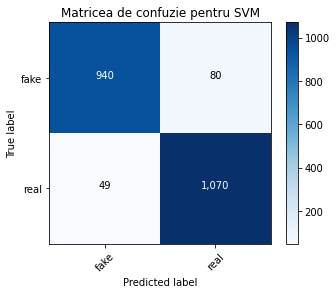

In [37]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
fit = pipeline.fit(traintest_train['tweet'],traintest_train['label'])
print('SVM')
print ('test:')

pred=pipeline.predict(traintest_test['tweet'])
print_metrices(pred,traintest_test['label'])
plot_confusion_matrix(confusion_matrix(traintest_test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Matricea de confuzie pentru SVM')

In [33]:
predata=pipeline.predict(data09['tweet'])
print(predata)
data_df = pd.DataFrame(data09)
data_df['label'] = predata
print(data_df)
data_df.to_excel('26APRlabel.xlsx')

['real' 'real' 'fake' ... 'fake' 'fake' 'fake']
          id                                              tweet label
0          1  #Coronavirus Chronology Article 75 is out with...  real
1          2  Covid a leggo the bird now https://t.co/TxBcmX...  real
2          3  Americans should be asking why the Biden admin...  fake
3          4  @apmassaro3 It’s all about pressure points wit...  fake
4          5  @dzoolander85 Amazing fear mongering.  You are...  fake
...      ...                                                ...   ...
14995  14996  15/P_x000D_\n_x000D_\nThis helps explain why t...  real
14996  14997  Ivermectin does not reduce risk of COVID-19 _x...  fake
14997  14998  @laurenmill3r93 @mikalche @lopezobrador_ @Ocug...  fake
14998  14999  Indeed, you will know that we surely are truth...  fake
14999  15000  #SaudiArabia  General Presidency for the Affai...  fake

[15000 rows x 3 columns]


Logistic Regression
test:
[[ 926   94]
 [  61 1058]]
              precision    recall  f1-score   support

        fake       0.94      0.91      0.92      1020
        real       0.92      0.95      0.93      1119

    accuracy                           0.93      2139
   macro avg       0.93      0.93      0.93      2139
weighted avg       0.93      0.93      0.93      2139

Accuracy :  0.927536231884058
Precison :  0.9281169933878668
Recall :  0.927536231884058
F1 :  0.9276054857908298


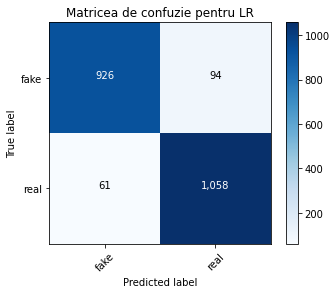

In [38]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(traintest_train['tweet'],traintest_train['label'])
print('Logistic Regression')
print ('test:')
pred=pipeline.predict(traintest_test['tweet'])

print_metrices(pred,traintest_test['label'])
plot_confusion_matrix(confusion_matrix(traintest_test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Matricea de confuzie pentru LR')

Gradient Boost
test:
[[ 896  124]
 [ 108 1011]]
              precision    recall  f1-score   support

        fake       0.89      0.88      0.89      1020
        real       0.89      0.90      0.90      1119

    accuracy                           0.89      2139
   macro avg       0.89      0.89      0.89      2139
weighted avg       0.89      0.89      0.89      2139

Accuracy :  0.8915381019167835
Precison :  0.8917255082348212
Recall :  0.8915381019167835
F1 :  0.8915818471366282


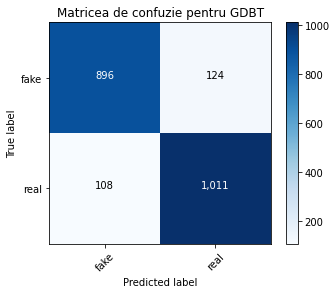

In [39]:
#minor variations in finla results due to randomness
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', GradientBoostingClassifier())
    ])
fit = pipeline.fit(traintest_train['tweet'],traintest_train['label'])
print('Gradient Boost')
print ('test:')
pred=pipeline.predict(traintest_test['tweet'])

print_metrices(pred,traintest_test['label'])
plot_confusion_matrix(confusion_matrix(traintest_test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Matricea de confuzie pentru GDBT')

Decision Tree
test:
[[ 875  145]
 [ 110 1009]]
              precision    recall  f1-score   support

        fake       0.89      0.86      0.87      1020
        real       0.87      0.90      0.89      1119

    accuracy                           0.88      2139
   macro avg       0.88      0.88      0.88      2139
weighted avg       0.88      0.88      0.88      2139

Accuracy :  0.8807854137447405
Precison :  0.8815030005875862
Recall :  0.8807854137447405
F1 :  0.8809080978855843


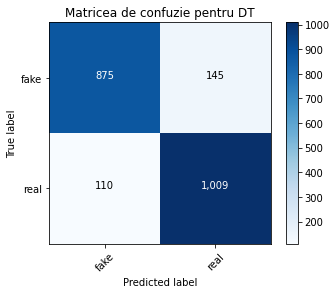

In [40]:
#minor variations in final results due to randomness
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])
fit = pipeline.fit(traintest_train['tweet'],traintest_train['label'])
print('Decision Tree')
print ('test:')
pred=pipeline.predict(traintest_test['tweet'])

print_metrices(pred,traintest_test['label'])
plot_confusion_matrix(confusion_matrix(traintest_test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Matricea de confuzie pentru DT')

In [42]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
fit = pipeline.fit(traintest_train['tweet'],traintest_train['label'])
print('SVM')
print ('test:')
pred=pipeline.predict(data09['tweet'])
print(pred)
data_df = pd.DataFrame(data09)
data_df['label'] = pred
print(data_df)
data_df.to_excel('data09label.xlsx')

SVM
test:
['real' 'fake' 'real' ... 'fake' 'real' 'real']
          id                                              tweet label
0          1  AwesomeCapital: CDC's New Guidelines on COVID ...  real
1          2  Remote communities closing up the Kimberley co...  fake
2          3  COVID-19 Cases, Deaths Continue To Drop Global...  real
3          4  @Struan_Tokyo I know that at one point Nagano ...  real
4          5  Mental Health &amp; Covid 19 https://t.co/RRBP...  real
...      ...                                                ...   ...
14995  14996  Registration for Advanced Aquatic Leadership c...  fake
14996  14997  @CashApp Hope everyone is doing well, especial...  fake
14997  14998  Government's drug and alcohol plans must be cl...  fake
14998  14999  @AFabulousState https://t.co/48GaAoYjmj :) _x0...  real
14999  15000  Many long term care residents died in COVID-19...  real

[15000 rows x 3 columns]


Decision Tree
test:
[[ 919  101]
 [  87 1032]]
              precision    recall  f1-score   support

        fake       0.91      0.90      0.91      1020
        real       0.91      0.92      0.92      1119

    accuracy                           0.91      2139
   macro avg       0.91      0.91      0.91      2139
weighted avg       0.91      0.91      0.91      2139

Accuracy :  0.9121084618980833
Precison :  0.9122476870780449
Recall :  0.9121084618980833
F1 :  0.9121389370385916


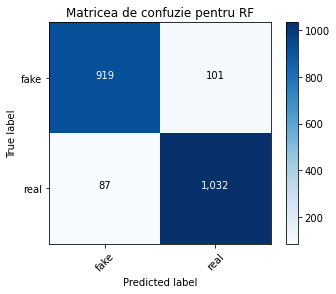

In [41]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', RandomForestClassifier())
    ])
fit = pipeline.fit(traintest_train['tweet'],traintest_train['label'])
print('Decision Tree')
print ('test:')
pred=pipeline.predict(traintest_test['tweet'])

print_metrices(pred,traintest_test['label'])
plot_confusion_matrix(confusion_matrix(traintest_test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Matricea de confuzie pentru RF')

Decision Tree
test:
[[ 946   74]
 [  50 1069]]
              precision    recall  f1-score   support

        fake       0.95      0.93      0.94      1020
        real       0.94      0.96      0.95      1119

    accuracy                           0.94      2139
   macro avg       0.94      0.94      0.94      2139
weighted avg       0.94      0.94      0.94      2139

Accuracy :  0.9420289855072463
Precison :  0.9423416504963099
Recall :  0.9420289855072463
F1 :  0.9420665125312802


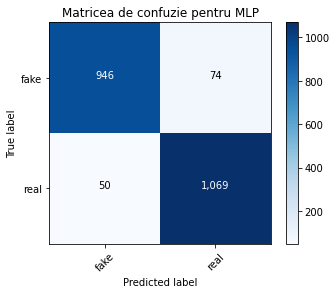

In [42]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c',MLPClassifier())
    ])
fit = pipeline.fit(traintest_train['tweet'],traintest_train['label'])
print('Decision Tree')
print ('test:')
pred=pipeline.predict(traintest_test['tweet'])

print_metrices(pred,traintest_test['label'])
plot_confusion_matrix(confusion_matrix(traintest_test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Matricea de confuzie pentru MLP')